In [5]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt 
from datetime import datetime

%matplotlib inline

In [5]:
pdr.get_data_yahoo('TSLA')

TypeError: string indices must be integers, not 'str'

In [6]:
# Retriving data using yfinance
import yfinance as yf
tesla = yf.download('TSLA')
tesla.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [7]:
print(f"Shape of the dataset {tesla.shape}")

Shape of the dataset (3455, 6)


<Axes: xlabel='Date'>

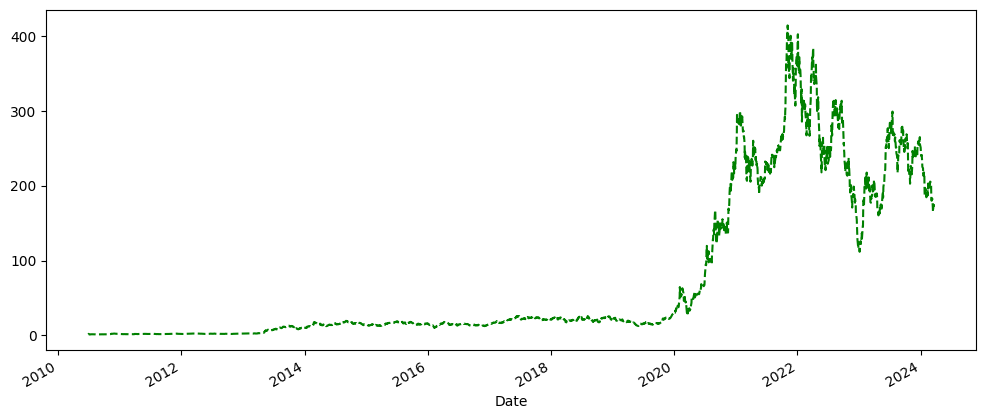

In [8]:
# ploting high stock prices for eachdays
tesla['High'].plot(figsize=(12,5),c='g',ls='--')

<h5>Applying Limit on x-axis and y-axis</h5>

<Axes: xlabel='Date'>

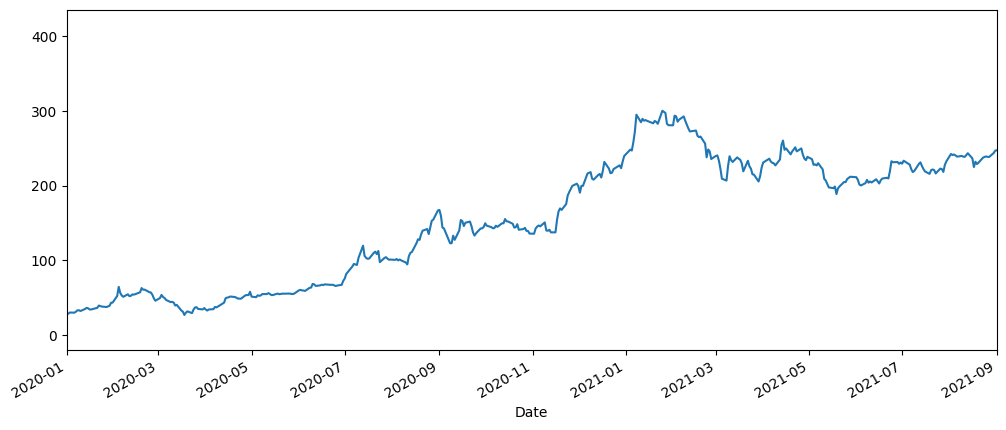

In [9]:
# Applying xlim
tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],figsize=(12,5))

<Axes: xlabel='Date'>

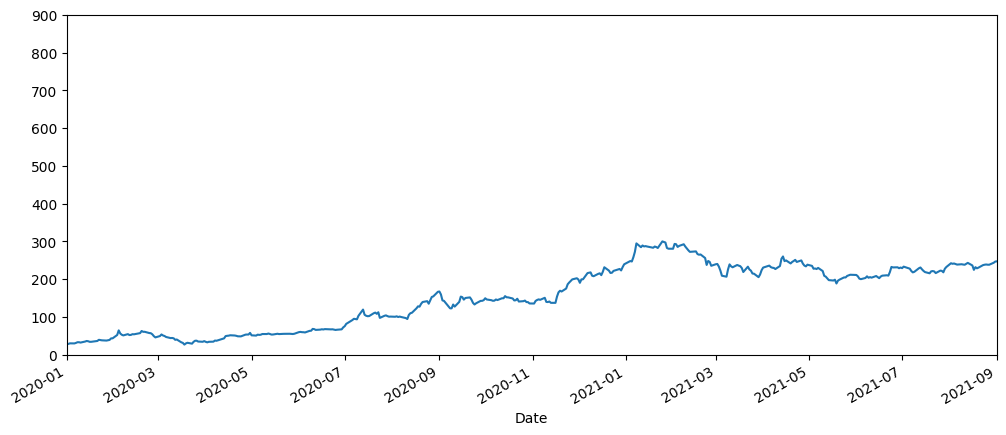

In [10]:
# applying xlim and ylim
tesla['High'].plot(xlim=['2020-01-01','2021-09-01'], ylim=[0,900], figsize=(12,5))

<h5>Indexing</h5>

In [11]:
index = tesla.loc['2020-01-02':'2021-09-01'].index
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

In [12]:
share_open = tesla.loc[index]['Open']
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
Name: Open, Length: 421, dtype: float64

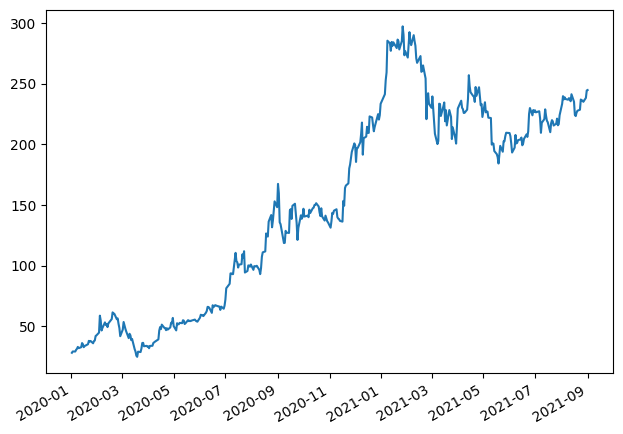

In [13]:
figure, axis = plt.subplots()

plt.tight_layout()
# Preventing overlapping on x-axis
figure.autofmt_xdate()

axis.plot(index,share_open)

plt.show()

<h4>DateTime</h4>

In [14]:
from datetime import datetime

<h3>In Time Series our index have to be in datetime formet</h3> 

<ol>
    <li> If the feature is in Object type convert it into datetime using <strong>pd.to_datetime(df['col']) </strong></li>
    <li> Then set the index using <strong>df.set_index('col',drop=True)</strong></li>
</ol>



In [15]:
# See current time
datetime.now()

datetime.datetime(2024, 3, 21, 14, 31, 59, 532786)

In [16]:
import time
# Calculate executation time
start = datetime.now()
for i in range(10):
    time.sleep(3)
end = datetime.now()
print(f"Executation Time = {end-start}")

Executation Time = 0:00:30.004685


In [17]:
# Define a date time
date = datetime(2021,11,21)
date

datetime.datetime(2021, 11, 21, 0, 0)

In [18]:
date.date()

datetime.date(2021, 11, 21)

In [19]:
date.day

21

In [20]:
date.month

11

In [21]:
date.year

2021

In [22]:
date.weekday()

6

<h3>Time Resampling</h3>

In [23]:
tesla.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [24]:
# Year end frequency
# It will show the max values for each column respect to every year
tesla.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-31,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-31,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-31,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


In [25]:
tesla.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,1.076000,1.108667,0.998667,1.053333,1.053333,1777500
2011-12-31,1.452000,1.484667,1.407333,1.455333,1.455333,3594000
2012-12-31,1.774667,1.790000,1.509333,1.519333,1.519333,5473500
2013-12-31,2.205333,2.225333,2.140667,2.194000,2.194000,6603000
2014-12-31,9.366667,9.800000,9.111333,9.289333,9.289333,19983000
2015-12-31,12.388667,12.619333,12.093333,12.333333,12.333333,10620000
2016-12-31,9.488000,10.331333,9.403333,9.578000,9.578000,24892500
2017-12-31,14.316667,14.688667,14.064000,14.466000,14.466000,32800500
2018-12-31,16.851999,17.355333,16.306000,16.704000,16.704000,46210500


<Axes: xlabel='Date'>

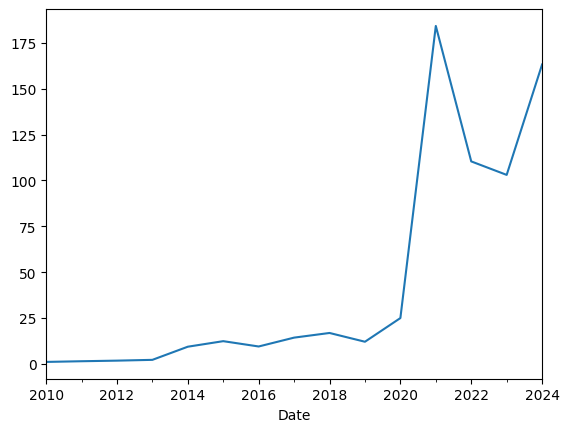

In [26]:
tesla.resample('A').min()['Open'].plot()

In [27]:
# Quaterly Start frequency (3 month)
tesla.resample(rule='QS').max().head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-04-01,1.719333,2.028,1.553333,1.592667,1.592667,281494500
2010-07-01,1.666667,1.728,1.408667,1.465333,1.465333,123282000
2010-10-01,2.391333,2.428,2.316667,2.364667,2.364667,139528500
2011-01-01,1.906000,1.914,1.870000,1.896667,1.896667,172767000
2011-04-01,2.006667,2.100,1.970000,2.009333,2.009333,93138000


<Axes: xlabel='Date'>

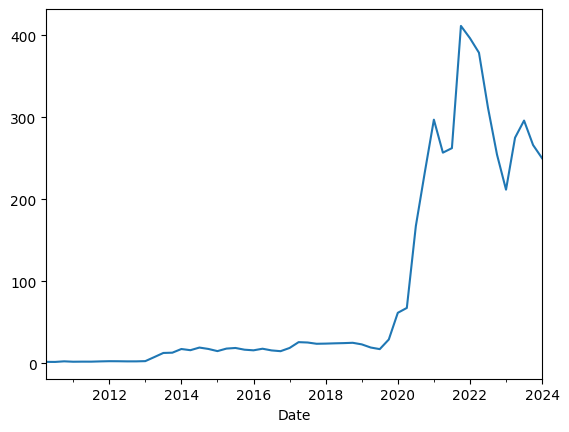

In [28]:
tesla.resample(rule='QS').max()['Open'].plot()

In [29]:
# Business start frequency
tesla.resample(rule='BA').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-30,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-30,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-29,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


In [35]:
# why rule='BA' showing 2011-12-30 insted od 2011-12-31?
tesla.loc['2011-12-29':'2012-01-07']
# because 2011-12-31 was friday

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-12-29,1.906000,1.956000,1.903333,1.915333,1.915333,7323000
2011-12-30,1.899333,1.932000,1.883333,1.904000,1.904000,5097000
2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500


<Axes: xlabel='Date'>

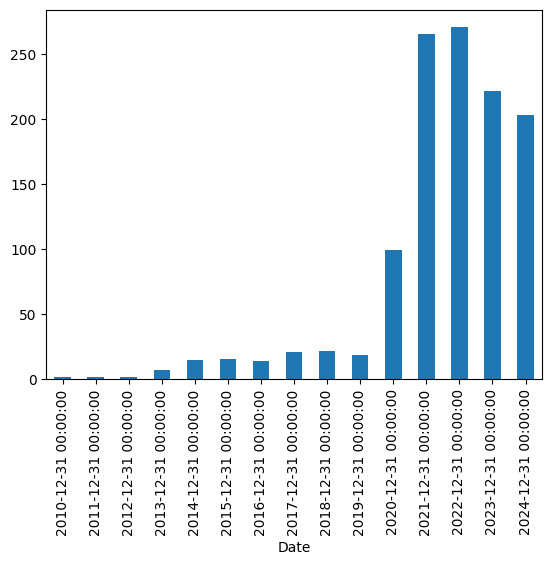

In [48]:
tesla['High'].resample(rule='A').mean().plot(kind='bar')

In [50]:
# monthly mean
tesla.resample(rule='M').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-30,1.493000,1.847334,1.361333,1.590667,1.590667,2.696505e+08
2010-07-31,1.338222,1.376000,1.254413,1.303873,1.303873,4.612557e+07
2010-08-31,1.303030,1.327333,1.272030,1.300727,1.300727,1.025332e+07
2010-09-30,1.385270,1.418413,1.353937,1.382698,1.382698,1.288993e+07
2010-10-31,1.381556,1.399524,1.361714,1.380889,1.380889,4.677000e+06
...,...,...,...,...,...,...
2023-11-30,229.011903,233.172381,223.741904,229.411905,229.411905,1.262285e+08
2023-12-31,246.967002,251.222501,243.238998,247.137998,247.137998,1.147299e+08
2024-01-31,217.457145,220.442856,213.241904,216.130476,216.130476,1.116088e+08


<Axes: xlabel='Date'>

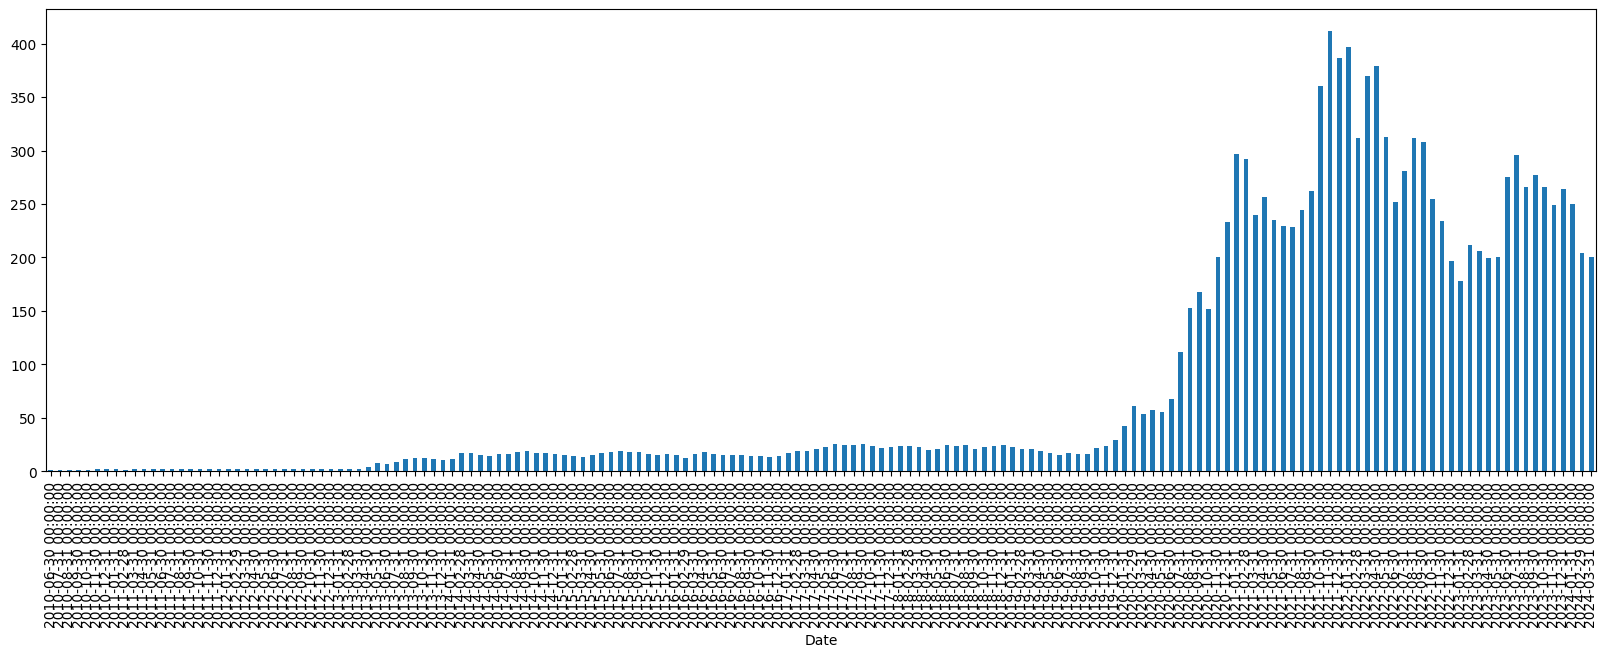

In [54]:
tesla['Open'].resample(rule='M').max().plot(kind='bar',figsize=(20,6))

<h3>Rolling</h3>

In [56]:
tesla['Open'].rolling(window=2).max()

Date
2010-06-29           NaN
2010-06-30      1.719333
2010-07-01      1.719333
2010-07-02      1.666667
2010-07-06      1.533333
                 ...    
2024-03-11    181.500000
2024-03-12    177.770004
2024-03-13    177.770004
2024-03-14    173.050003
2024-03-15    167.770004
Name: Open, Length: 3452, dtype: float64

In [84]:
# it will assign max value between two row
tesla['Open:rollingMax'] = tesla['Open'].rolling(window=2).max()
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Open:rollingMax
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.719333
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.719333
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.666667
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.533333


<Axes: xlabel='Date', ylabel='Open'>

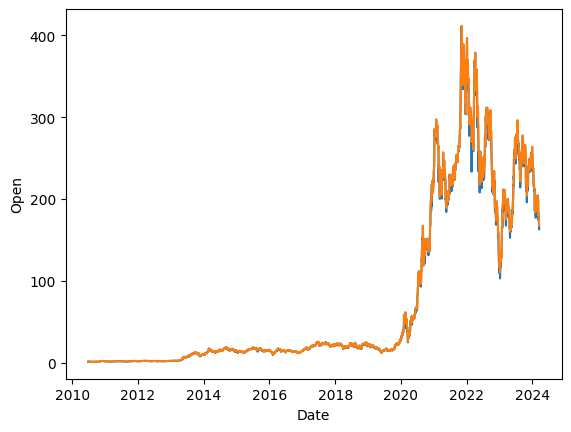

In [85]:
import seaborn as sns
sns.lineplot(data=tesla,x=tesla.index,y='Open')
sns.lineplot(data=tesla,x=tesla.index,y='Open:rollingMax')

<Axes: xlabel='Date'>

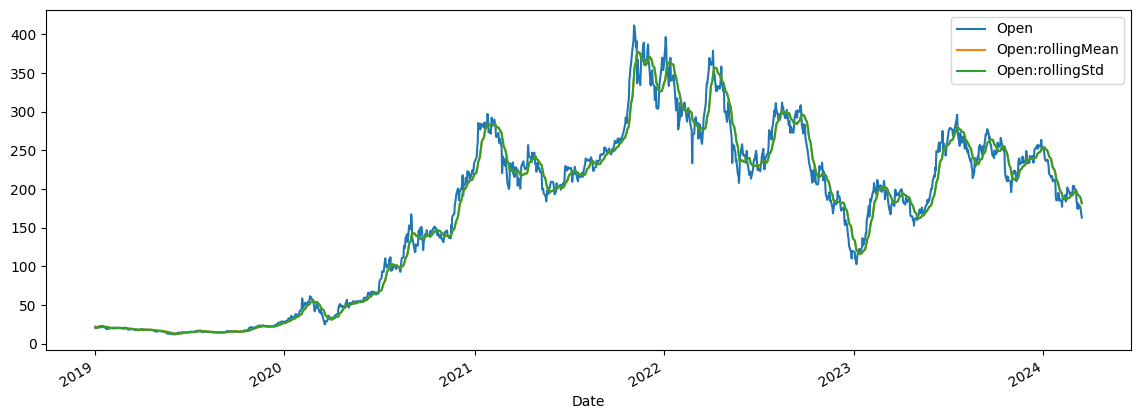

In [91]:
# it will assign max value between two row
tesla['Open:rollingMean'] = tesla['Open'].rolling(window=12).mean()
tesla['Open:rollingStd'] = tesla['Open'].rolling(window=12).mean()
tesla[['Open','Open:rollingMean','Open:rollingStd']].loc['2019-01-01':].plot(figsize=(14,5))

### Ass
1. Read the Microsoft Data using Pandas Data reader
2. Get the maximum price of the share from 2017 to 2022
3. Which is the date of the highest price of the stock?
4. Which is the date of the lowest price of the stock?

In [98]:
# import pandas_datareader.data as web
# microsoft = web.DataReader('MSFT','yahoo',start='2015-01-01',end='2023-12-31')
# microsoft

In [104]:
microsoft = yf.download('MSFT')
microsoft

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060163,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062311,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063386,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061774,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060700,47894400
...,...,...,...,...,...,...
2024-03-11,403.760010,405.679993,401.260010,404.519989,404.519989,16120800
2024-03-12,407.619995,415.570007,406.790009,415.279999,415.279999,22457000
2024-03-13,418.100006,418.179993,411.450012,415.100006,415.100006,17115900


<Axes: xlabel='Date'>

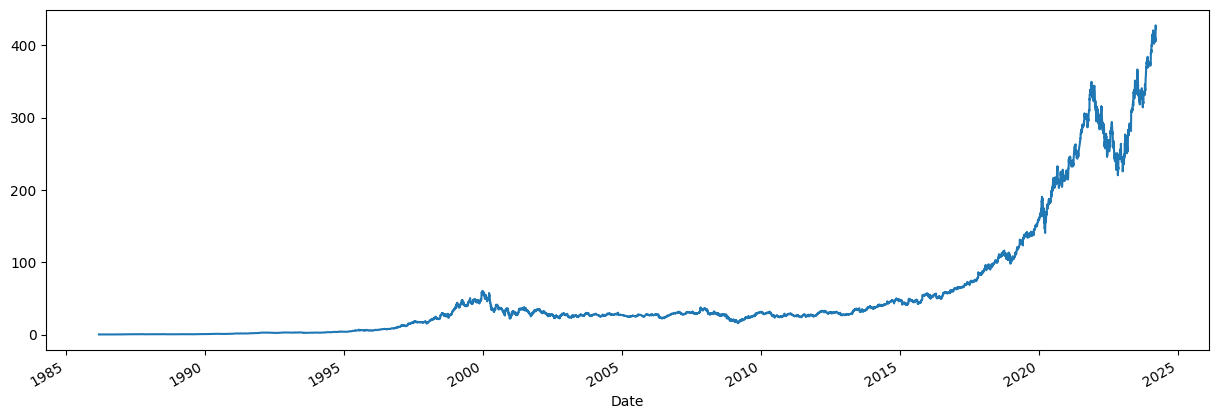

In [116]:
microsoft['High'].plot(figsize=(15,5))

<Axes: xlabel='Date'>

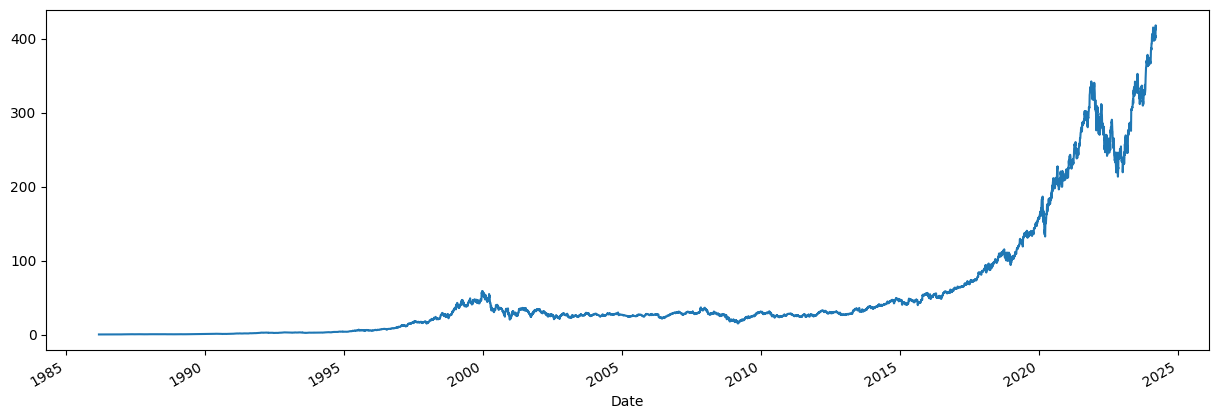

In [117]:
microsoft['Low'].plot(figsize=(15,5))

In [106]:
microsoft['High'].loc['2017':'2022'].max()

349.6700134277344

In [107]:
# Highest stock price between 2017 to 2022
microsoft['High'].loc['2017-01-01':'2022-12-31'].max()

349.6700134277344

In [122]:
# Date of the highest stock price between 2017 to 2022
microsoft[microsoft['High'] == microsoft['High'].loc['2017-01-01':'2022-12-31'].max()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-22,344.619995,349.670013,339.549988,339.829987,333.10025,31031100


In [124]:
microsoft[microsoft['Open'] == microsoft['Open'].loc['2012':'2024'].min()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-11-07,26.379999,26.490000,26.030001,26.10,16.294018,57822100
2004-06-10,26.379999,26.790001,26.379999,26.77,16.712305,48109200
2008-10-01,26.379999,26.990000,26.280001,26.48,19.456255,88957000
2011-11-04,26.379999,26.400000,26.000000,26.25,20.670546,36549200
2012-12-05,26.379999,26.930000,26.260000,26.67,21.757828,68283800


In [126]:
microsoft[microsoft['Low'] == microsoft['Low'].loc['2012':'2024'].min()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-12-29,26.410000,26.500000,26.26,26.27,18.556410,34495500
2006-01-20,27.010000,27.010000,26.26,26.41,18.655300,79165900
2010-05-24,26.850000,26.860001,26.26,26.27,20.071627,73711700
2011-07-18,26.629999,26.900000,26.26,26.59,20.806948,44501900
2011-08-31,26.290001,26.709999,26.26,26.60,20.946148,59300800
2012-12-05,26.379999,26.930000,26.26,26.67,21.757828,68283800
